# 0.) Import the Credit Card Fraud Data From CCLE

In [ ]:
## Nic Carpino Feb 3, 2023
#441B A4

In [42]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [43]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [44]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/fraudTest.csv")

#same data as last week

In [45]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [98]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

<ipython-input-98-7828536f663a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-98-7828536f663a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [99]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

#type(df["trans_date_trans_time"][0])
#df_select = df[["trans_date_trans_time","category","amt","city_pop", "is_fraud"]]

#df_select["time_var_before"] = df_select["trans_date_trans_time"]
#df_select["time_var_before"] = df_select["time_var_before"].str.replace("-","")
#df_select["time_var_before"] = df_select["time_var_before"].str.replace(" ","")
#df_select["time_var_before"] = df_select["time_var_before"].str.replace(":","")
#df_select["time_var"] = np.nan
#df_select['time_var_before'] = df_select['time_var_before'].astype('int')

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [100]:
from sklearn.model_selection import train_test_split

In [28]:
#another way to get dummies

#dummies = pd.get_dummies(df_select["category"])
#X = pd.concat([dummies, df_select[["amt","city_pop", "time_var"]]], axis = 1) 
#y = df_select["is_fraud"] 

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [102]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [112]:
ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)

X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)
#oversample


In [113]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

#SMOTE

In [114]:
rus = RandomUnderSampler(random_state=0)

rus.fit(X, y)

X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

#undersample


# 3.) Train three logistic regression models 

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
log_reg_ros = LogisticRegression().fit(X_oversampled, y_oversampled)

In [117]:
log_reg_rus = LogisticRegression().fit(X_undersampled, y_undersampled)


In [119]:
log_reg_smote = LogisticRegression().fit(X_smote, y_smote)

# 4.) Test the three models

In [120]:
y_pred_ros = log_reg_ros.predict(X_test)

In [121]:
y_pred_rus = log_reg_rus.predict(X_test)

In [122]:
y_pred_smote = log_reg_smote.predict(X_test)

# 5.) Which performed best in Out of Sample metrics?

In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
conf_matrix_ros = confusion_matrix(y_test, y_pred_ros)
print("Confusion Matrix: ", conf_matrix_ros)

Confusion Matrix:  [[312091  75452]
 [   345   1116]]


In [125]:
conf_matrix_rus = confusion_matrix(y_test, y_pred_rus)
print("Confusion Matrix: ", conf_matrix_rus)

Confusion Matrix:  [[310583  76960]
 [   341   1120]]


In [126]:
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix: ", conf_matrix_smote)

Confusion Matrix:  [[314506  73037]
 [   354   1107]]


In [127]:
def true_pos(matrix):
    TP = matrix [1][1]/(matrix [1][0] + matrix [1][1])
    return TP

In [130]:
print(true_pos(conf_matrix_ros))
print(true_pos(conf_matrix_rus))
print(true_pos(conf_matrix_smote))

0.7638603696098563
0.7665982203969883
0.757700205338809


In [132]:
#true positive fraud detection for random oversampling is 0.76386

#true positive fraud detection for random undersampling is 0.76659

#true positive fraud detection for SMOTE oversampling is 0.75770



In [133]:
#The random under sampling resulted in the highest TP rate in the ability to accurately detect instances of fraud
#With all three metrics producing similar results, it is important to look at other methods (over-sampling or SMOTE) with a large dataset.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [134]:
import matplotlib.pyplot as plt

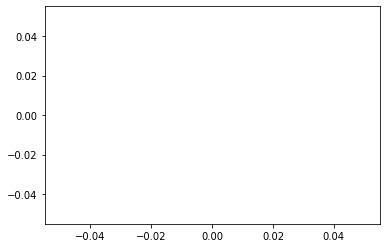

In [137]:
#plt.plot()
#plt.show()

In [142]:
#X_train[X_train["is_fraud"] == 1][["amt", "city_pop", ]


In [139]:
OG_data_temp = pd.concat([X_train, y_train], axis = 1)

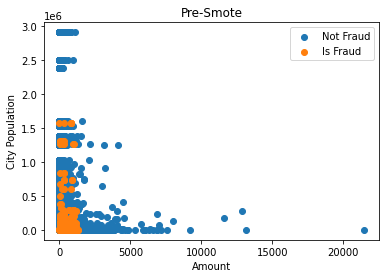

In [141]:
plt.scatter(OG_data_temp[OG_data_temp['is_fraud']==0]['amt'], OG_data_temp[OG_data_temp['is_fraud']==0]['city_pop'])
plt.scatter(OG_data_temp[OG_data_temp['is_fraud']==1]['amt'], OG_data_temp[OG_data_temp['is_fraud']==1]['city_pop'])
plt.legend(['Not Fraud', 'Is Fraud'])
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.title('Pre-Smote')

plt.show()

In [146]:
smote_data_temp = pd.concat([X_smote, y_smote], axis =1)

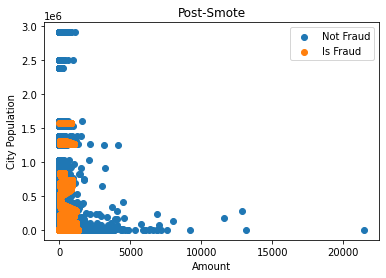

In [148]:
plt.scatter(smote_data_temp[smote_data_temp['is_fraud']==0]['amt'], smote_data_temp[smote_data_temp['is_fraud']==0]['city_pop'])
plt.scatter(smote_data_temp[smote_data_temp['is_fraud']==1]['amt'], smote_data_temp[smote_data_temp['is_fraud']==1]['city_pop'])
plt.legend(['Not Fraud', 'Is Fraud'])
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.title('Post-Smote')

plt.show()